In [ ]:
from IPython.display import clear_output

In [ ]:
!pip install pennylane

clear_output()

In [ ]:
from pennylane import numpy as np

In [ ]:
import pennylane as qml

# Universal Gate Sets

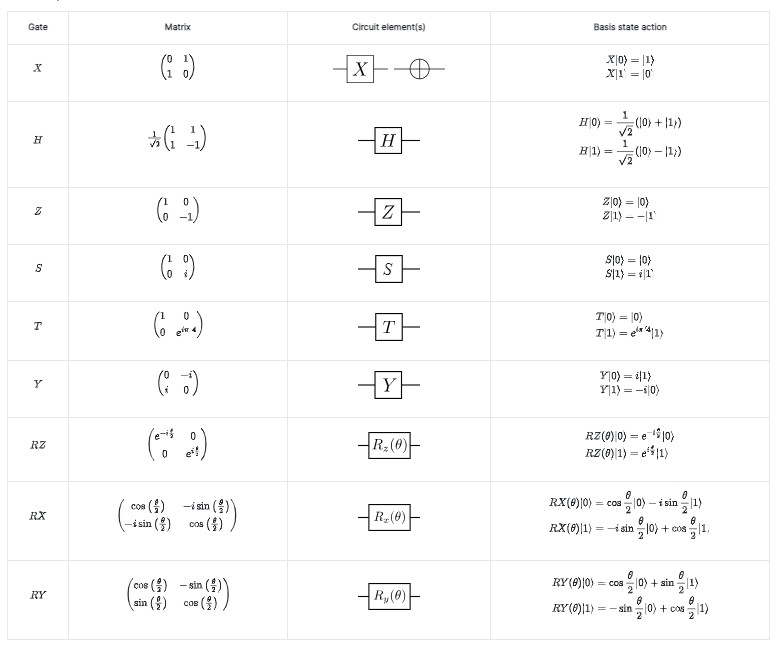

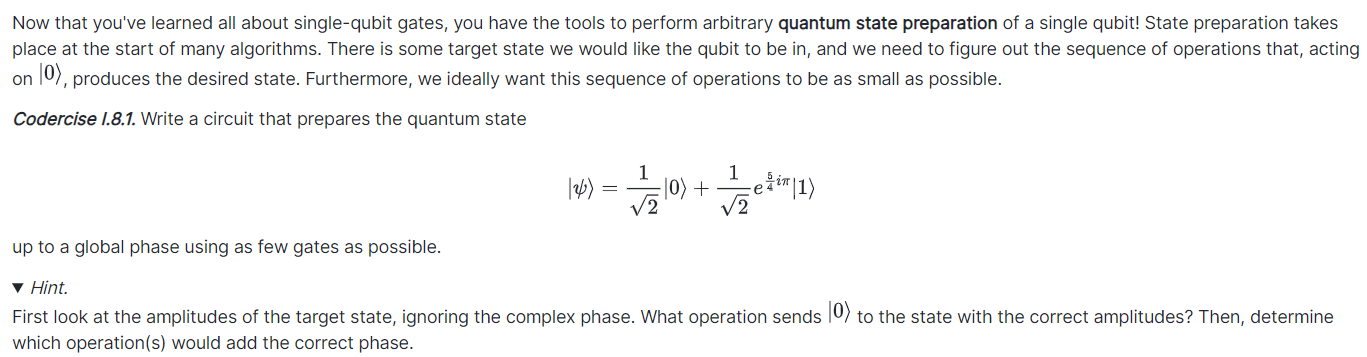

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
        #Prepare the state to |+>
    qml.Hadamard(wires = 0)


    #Change the relative phase of |1> to e^(i*pi*5/4)
    qml.RZ(np.pi*5/4, wires = 0)


    return qml.state()


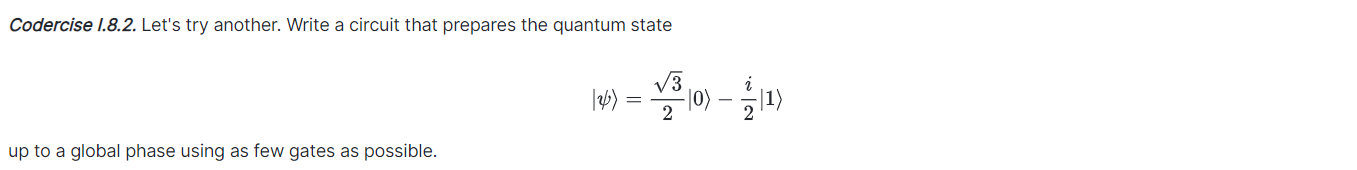

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    theta = (np.sqrt(3) / 2)
    qml.RY(theta, wires = 0)

    qml.RY(np.pi/2, wires = 0)


    return qml.state()

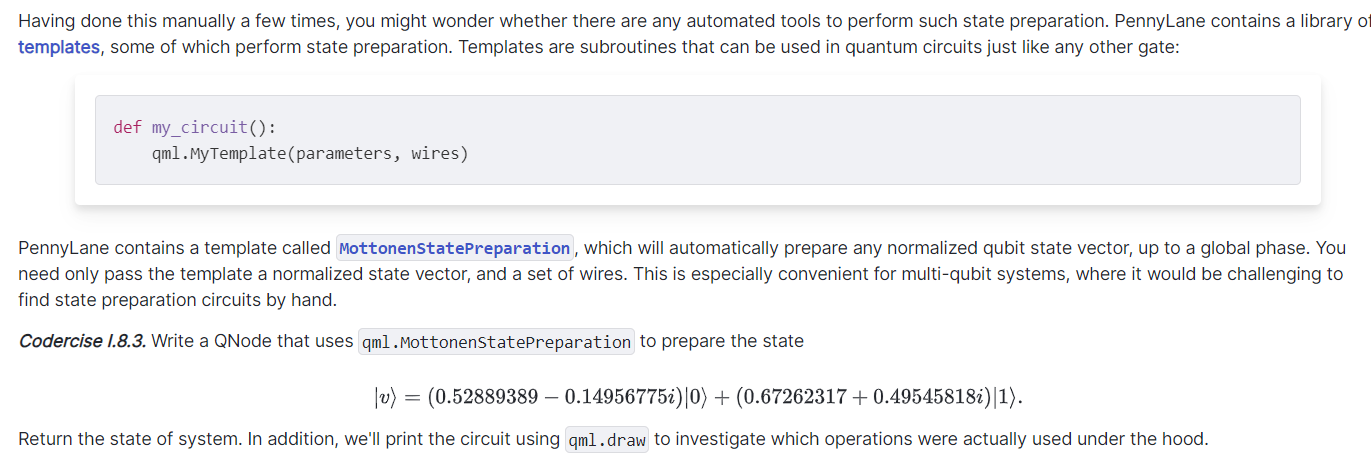

In [ ]:
v = np.array([0.52889389-0.14956775j, 0.67262317+0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)


# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE

def prepare_state(state):
    qml.MottonenStatePreparation(state, wires=0)
    return qml.state()

# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy='device')(v))


[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──RY(1.98)──RZ(0.91)──GlobalPhase(-0.18)─┤  State


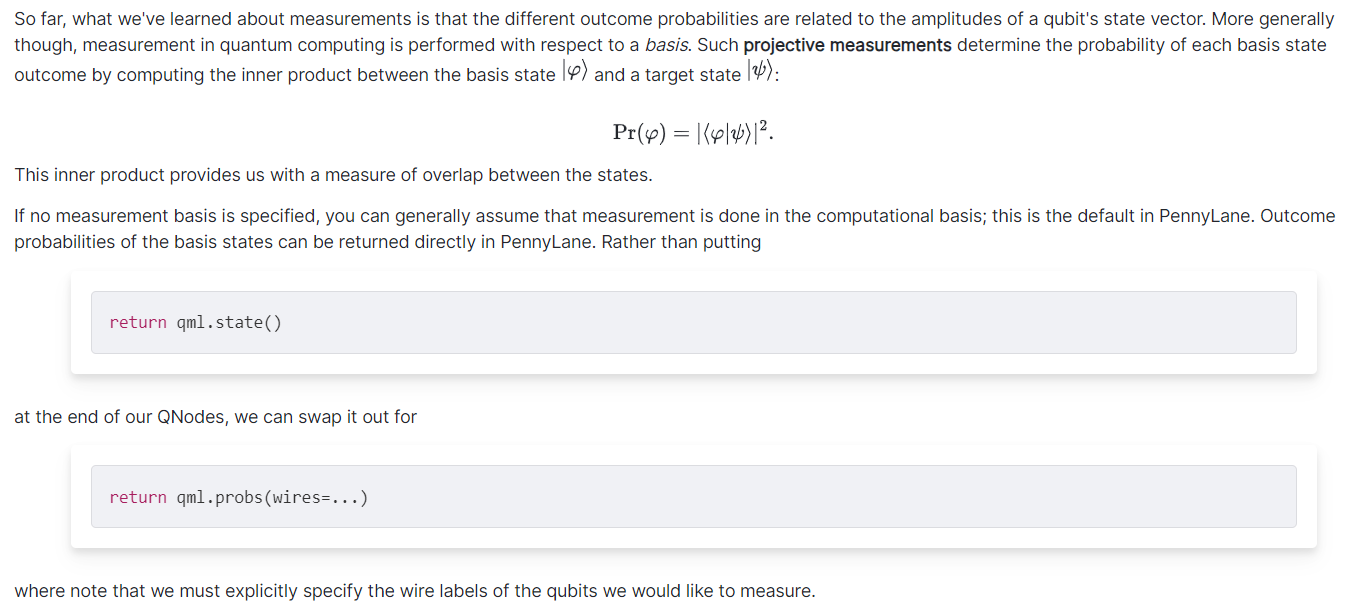

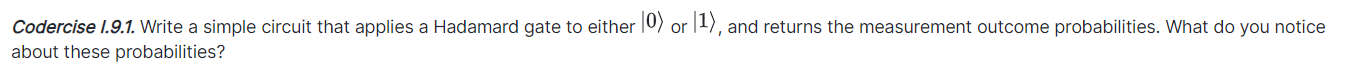

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY HADAMARD AND MEASURE

    return

print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


[0.5 0.5]
[0.5 0.5]


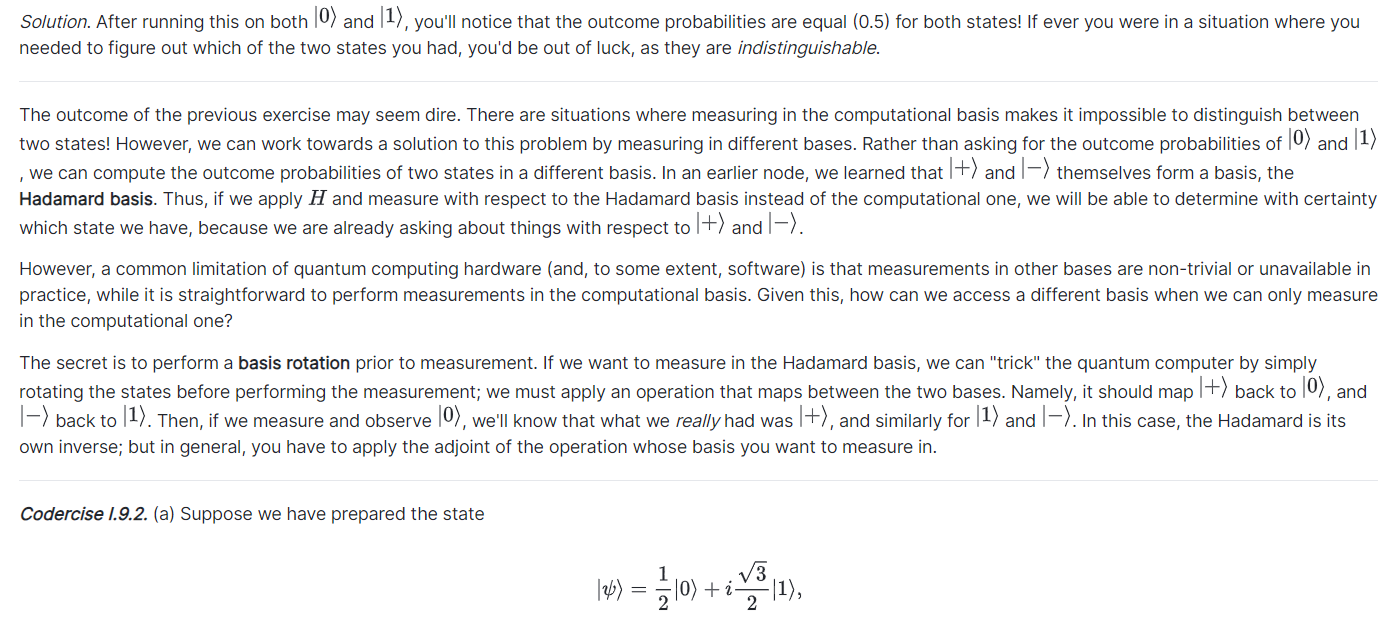

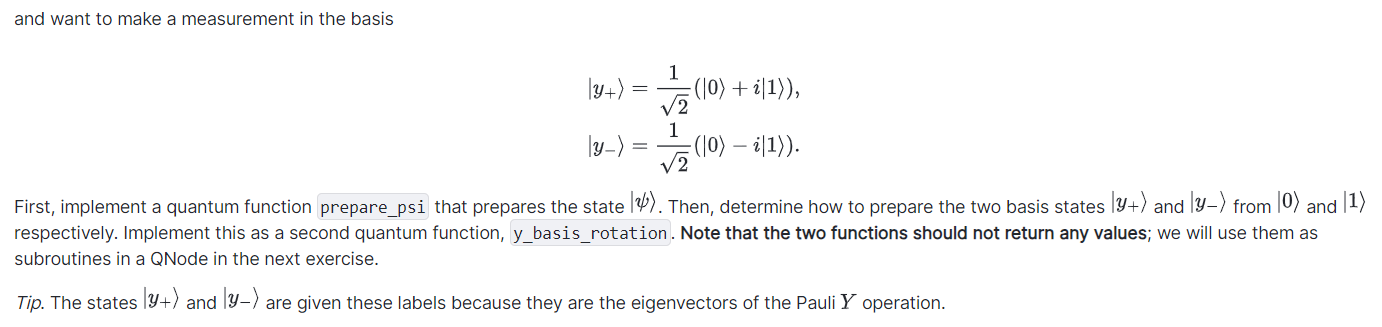

In [ ]:
##################
# YOUR CODE HERE #
##################
dev = qml.device("default.qubit", wires = 1)

@qml.qnode(dev)

# Prepares the state (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_state(state):
  qml.RY(np.pi/2, wires = 0)
  theta = (np.sqrt(3) / 2)
  qml.RY(theta, wires = 0)
  return qml.state


# Quantum function that maps |0> TO |y_+> and |1> TO |y_->
@qml.qnode(dev)
def mapping(state):
  if state == 0:
    qml.Hadamard(wires = 0)
  else:
    qml.Hadamard(wires = 0)
    qml.PauliZ(wires = 0)
  return qml.state()


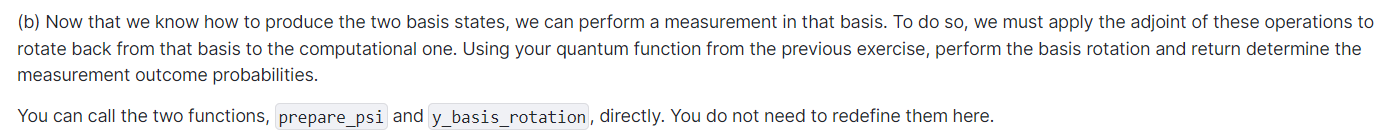

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE
    qml.RY(np.pi/2, wires = 0)
    theta = (np.sqrt(3) / 2)
    qml.RY(theta, wires = 0)

    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.Hadamard(wires=0)
    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES
    return qml.probs(wires=0)



print(measure_in_y_basis())


[0.82392967 0.17607033]


# Expectation values

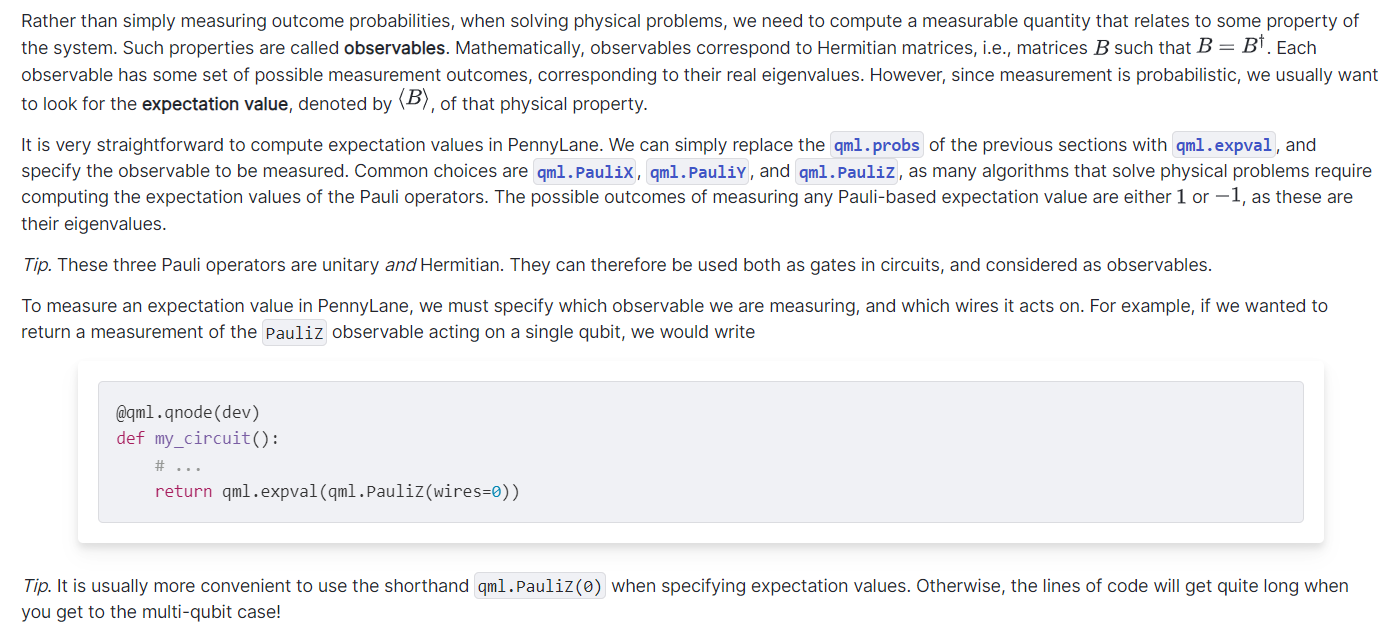

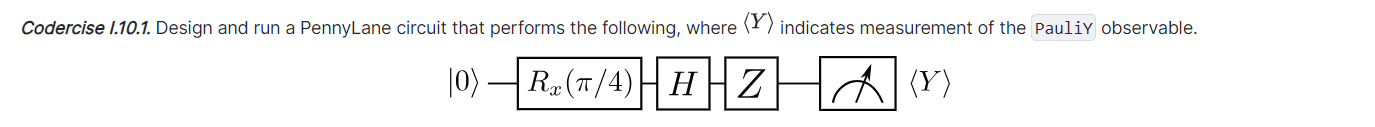

In [ ]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    return qml.expval(qml.PauliY(0))

print(circuit())

-0.7071067811865471


# Entanglement

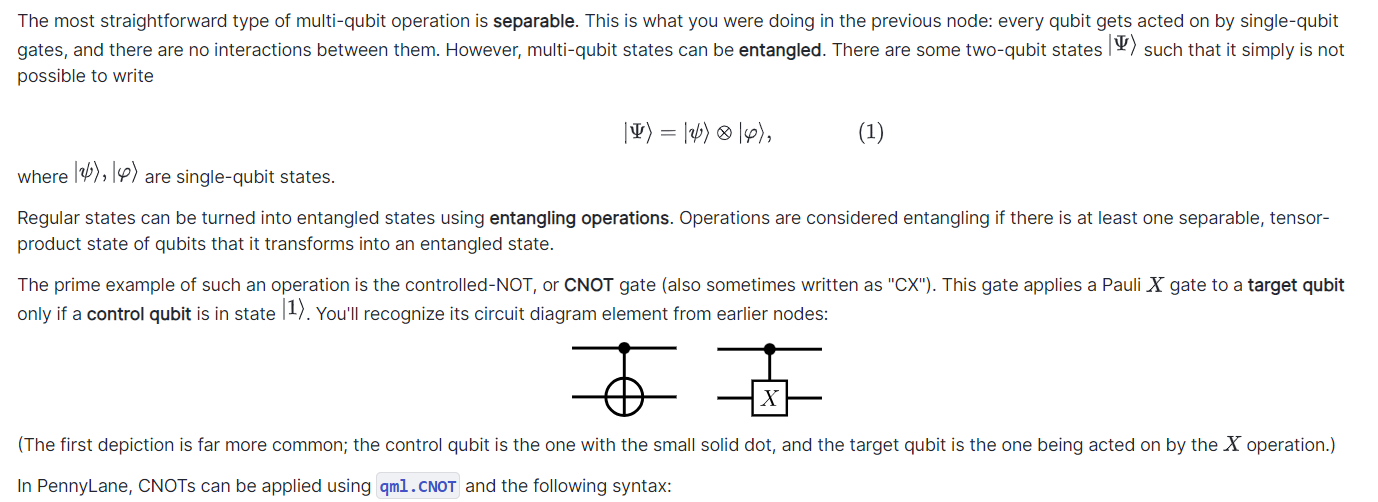

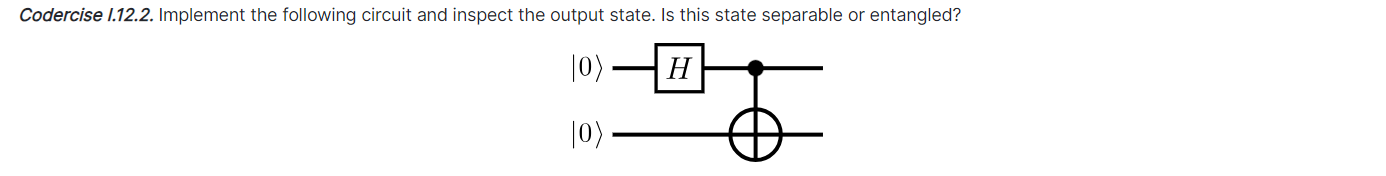

In [ ]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    # APPLY THE OPERATIONS IN THE CIRCUIT

    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"



[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


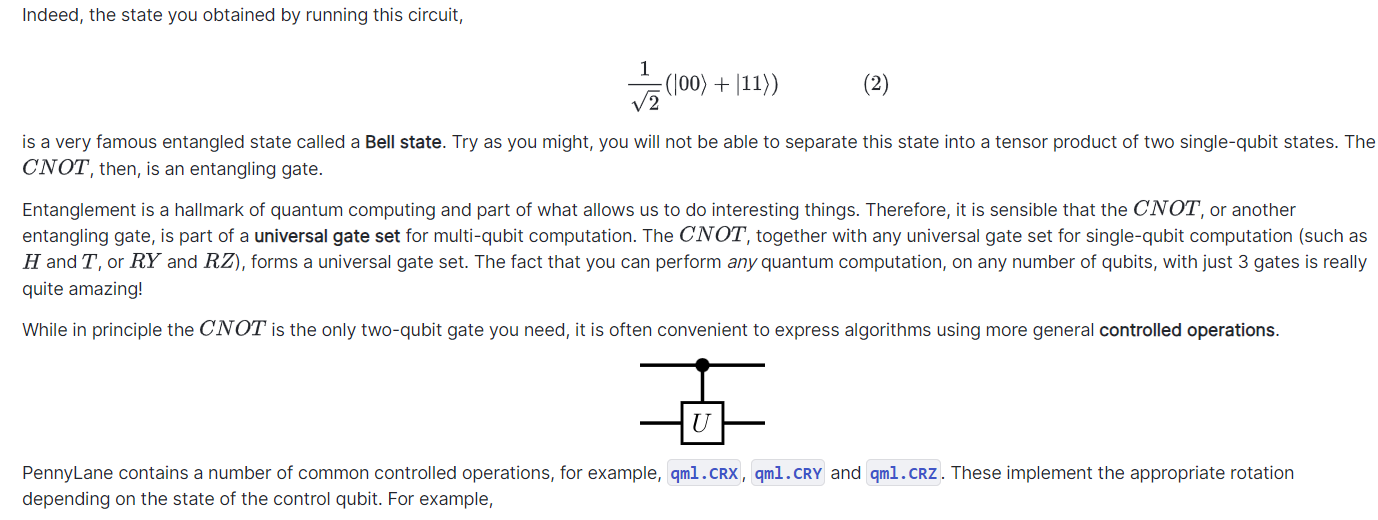

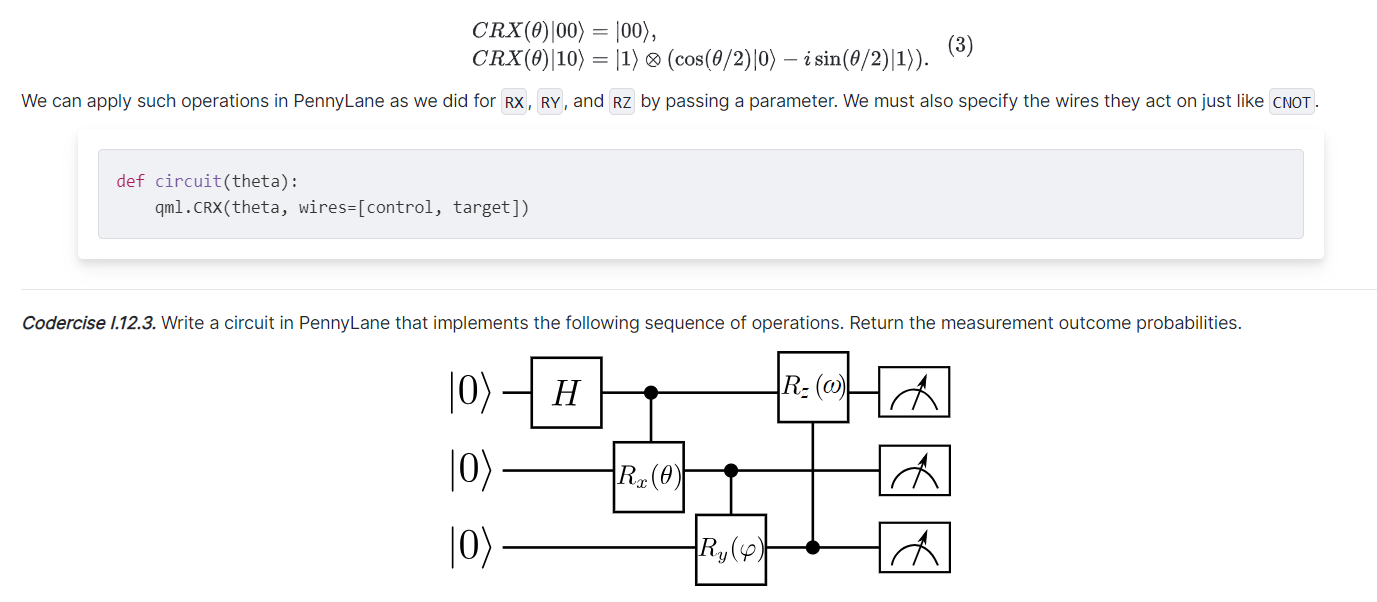

In [ ]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.RX(theta, wires = 0)
    qml.CNOT(wires = [1,2])
    qml.RY(phi, wires = 0)
    qml.RZ(omega, wires = 0)
    qml.CNOT(wires = [2,0])

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES

    return qml.probs(wires=[0,1,2])

theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


[0.49379258 0.         0.         0.49379258 0.00620742 0.
 0.         0.00620742]


# Bell Basis

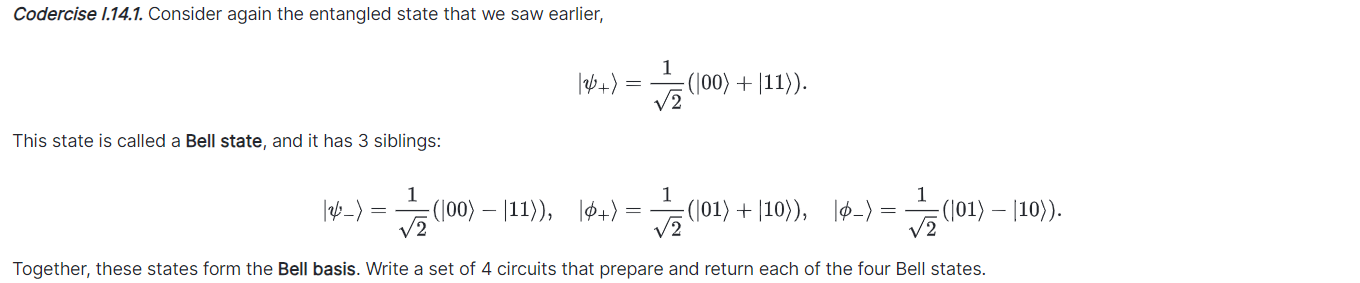

In [ ]:
dev = qml.device('default.qubit', wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.

@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> + |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> - |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=0)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> + |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliX(wires=1)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> - |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=0)
    qml.PauliX(wires=1)
    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
#print(f"|ψ_+> = {psi_plus}")
#print(f"|ψ_-> = {psi_minus}")
#print(f"|ϕ_+> = {phi_plus}")
#print(f"|ϕ_-> = {phi_minus}")


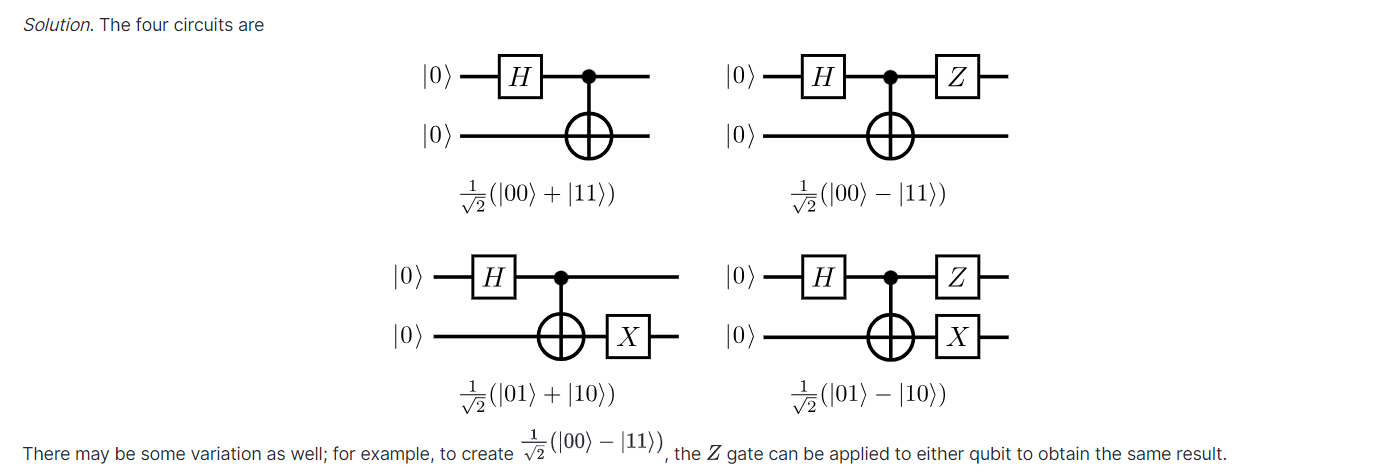

# Quantum Teleportation

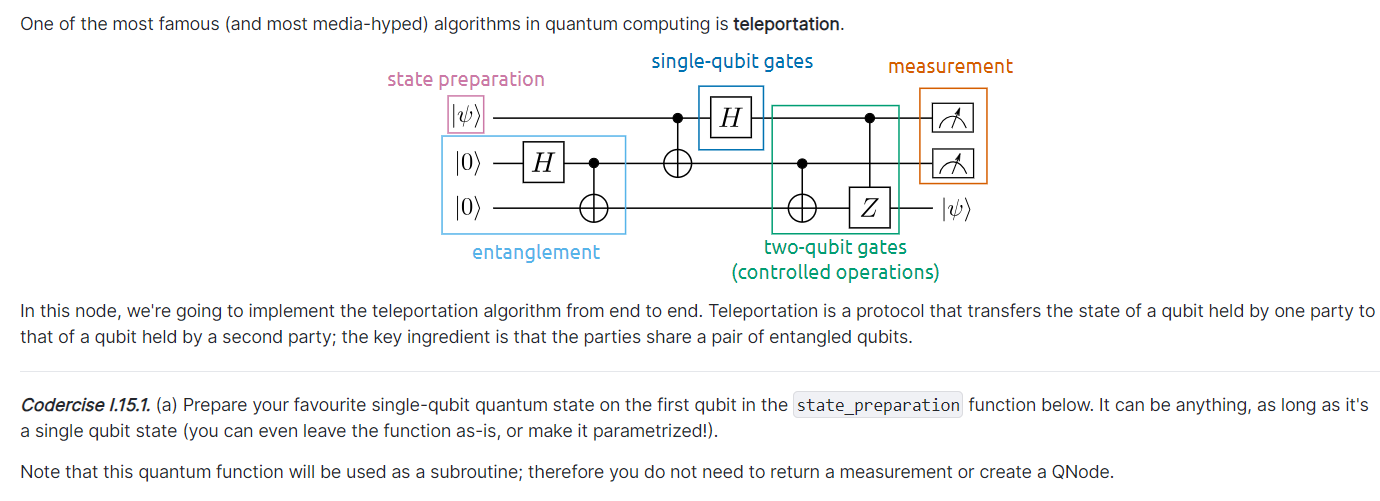

In [ ]:
def state_preparation():
    ##################
    # YOUR CODE HERE #
    ##################


    # OPTIONALLY UPDATE THIS STATE PREPARATION ROUTINE

    qml.Hadamard(wires=0)
    qml.Rot(0.1, 0.2, 0.3, wires=0)
